# Regressão Linear do PIb



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import math

columns=['PopEstimada_2018','PopCenso_2010','IDHM','ReceitasRealizadas_2014','DespesasEmpenhadas_2014','Pib_2014']

In [43]:
# Carregando os datos formatados
data = pd.read_csv (r'data/DATA_F.csv')
df = pd.DataFrame(data, columns=columns)
df

,PopEstimada_2018,PopCenso_2010,IDHM,ReceitasRealizadas_2014,DespesasEmpenhadas_2014,Pib_2014
0,23167,24392,0.641,53490,47577,16461.11
1,5438,6313,0.650,22635,19354,18346.17
2,84813,78574,0.718,169636,155473,20725.23
3,16444,17029,0.692,53147,46774,22179.17
4,16227,18591,0.685,34612,34381,15300.88
...,...,...,...,...,...,...
4613,13746,12548,0.712,37777,33220,23237.24
4614,8611,7371,0.684,26783,23511,39480.36
4615,6026,4735,0.647,17295,15646,18992.37
4616,5758,5145,0.634,19148,16785,35691.39


In [44]:
# Selecionando o target e a base de dados
X, y = df.drop("Pib_2014", axis=1), df['Pib_2014']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Y_prev = regression.predict(X_test)

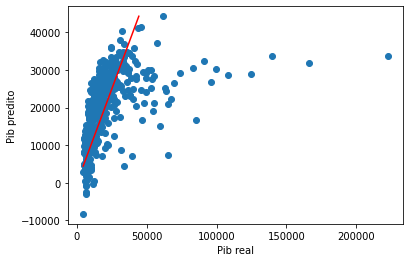

In [45]:
plt.scatter(y_test, Y_prev)
range = [y_test.min(), Y_prev.max()]
plt.plot(range, range, 'red')
plt.xlabel('Pib real')
plt.ylabel('Pib predito')
plt.show()

In [46]:
print('R2', r2_score(y_test, Y_prev))
print(f'MAE {mean_absolute_error(y_test, Y_prev)}')
print(f'MSE {mean_squared_error(y_test, Y_prev)}')

mse = mean_squared_error(y_test, Y_prev)
print(f'RMSE {math.sqrt(mse)}')

R2 0.24370150576372096
MAE 9123.036113254742
MSE 326830318.518286
RMSE 18078.449007541712
